<a href="https://colab.research.google.com/github/eman-mohamed-fue/Lab-1/blob/main/project_phase2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.feature_selection import chi2
from sklearn.feature_selection import SelectKBest

In [ ]:
# Step 1: Load the dataset
data = pd.read_csv("Crop_recommendation.csv")

In [ ]:
# Display the head
print(data.head())
print(data.columns)

    N   P   K  temperature   humidity        ph    rainfall label
0  90  42  43    20.879744  82.002744  6.502985  202.935536  rice
1  85  58  41    21.770462  80.319644  7.038096  226.655537  rice
2  60  55  44    23.004459  82.320763  7.840207  263.964248  rice
3  74  35  40    26.491096  80.158363  6.980401  242.864034  rice
4  78  42  42    20.130175  81.604873  7.628473  262.717340  rice
Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label'], dtype='object')


In [ ]:
# Step 2: Data Cleaning
# Check for missing values
print(data.isnull().sum())
# Drop the missing values
data.dropna(inplace=True)  # Example: dropping rows with missing values


N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64


In [ ]:
# Step 3: Data Preprocessing
# Label encoding for the categorical column
label_encoder = LabelEncoder()
data['label'] = label_encoder.fit_transform(data['label'])


In [ ]:
# # Checking if there are any negative values of X before scaling
# print("Minimum values of X before scaling:")
# print(X.min())

# Scaling numerical columns
scaler = StandardScaler()
numerical_cols = ['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']
data[numerical_cols] = scaler.fit_transform(data[numerical_cols])

# # Checking if there are any negative values of X after scaling
# print("Minimum values of X after scaling:")
# print(X.min())

In [ ]:
# Step 4: Split the dataset
X = data.drop('label', axis=1)
y = data['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Step 5: Train Decision Tree Models with different max_depth values
max_depths = range(1, 11)
accuracies = []

for max_depth in max_depths:
    model = DecisionTreeClassifier(max_depth=max_depth)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)

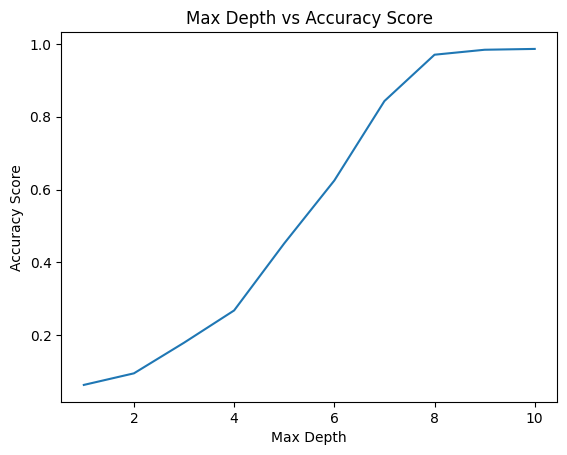

In [ ]:
# Step 6: Plotting the results
plt.plot(max_depths, accuracies)
plt.xlabel('Max Depth')
plt.ylabel('Accuracy Score')
plt.title('Max Depth vs Accuracy Score')
plt.show()

In [ ]:
# Train the final Decision Tree model with max_depth = 10
final_model = DecisionTreeClassifier(max_depth=10)
final_model.fit(X_train, y_train)

# Evaluate the model on the test data
y_final_pred = final_model.predict(X_test)
final_accuracy = accuracy_score(y_test, y_final_pred)
print(f"Final model accuracy with max_depth = 10: {final_accuracy}")

Final model accuracy with max_depth = 10: 0.9886363636363636


In [ ]:
# Step 7: Feature Selection using Chi-Square test
# Checking for negative values in X
if (X < 0).any().any():
    print("Negative values found in X. Transforming negative values to non-negative.")
    # Transform negative values by adding a constant (e.g., abs(min(X.min())) + 1)
    X = X + abs(X.min()) + 1
# Applying the Chi-Square test
chi2_values, p_values = chi2(X, y)
feature_selection = SelectKBest(chi2, k='all').fit(X, y)
selected_features = feature_selection.get_support(indices=True)
print("Selected features based on Chi-Square test:", X.columns[selected_features])

Negative values found in X. Transforming negative values to non-negative.
Selected features based on Chi-Square test: Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall'], dtype='object')


### Import PyTorch Libraries

In [ ]:
#Sara

### Define the ANN Model

In [ ]:
#Sara

### Prepare Data for PyTorch

In [ ]:
#Shimaa

### Cross-Validation Setup

In [ ]:
#Shimaa

# Convert data to PyTorch tensors
X_tensor = torch.tensor(X_train.values, dtype=torch.float32)
y_tensor = torch.tensor(y_train.values, dtype=torch.long) # CrossEntropyLoss expects long type for labels
X_test_tensor = torch.tensor(X_test.values, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.long)

# Create TensorDataset and DataLoader for batching (optional for full batch training, but good practice )
train_dataset = TensorDataset(X_tensor, y_tensor)
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)


### Training and Evaluation with Cross-Validation

In [ ]:
#Maryam and Farah

--- Fold 1 ---
Validation Accuracy: 0.9744, Precision: 0.9751, Recall: 0.9744, F1-score: 0.9745
--- Fold 2 ---
Validation Accuracy: 0.9744, Precision: 0.9751, Recall: 0.9744, F1-score: 0.9745
--- Fold 2 ---
Validation Accuracy: 0.9886, Precision: 0.9900, Recall: 0.9886, F1-score: 0.9884
--- Fold 3 ---
Validation Accuracy: 0.9886, Precision: 0.9900, Recall: 0.9886, F1-score: 0.9884
--- Fold 3 ---
Validation Accuracy: 0.9858, Precision: 0.9864, Recall: 0.9858, F1-score: 0.9859
--- Fold 4 ---
Validation Accuracy: 0.9858, Precision: 0.9864, Recall: 0.9858, F1-score: 0.9859
--- Fold 4 ---
Validation Accuracy: 0.9830, Precision: 0.9835, Recall: 0.9830, F1-score: 0.9831
--- Fold 5 ---
Validation Accuracy: 0.9830, Precision: 0.9835, Recall: 0.9830, F1-score: 0.9831
--- Fold 5 ---
Validation Accuracy: 0.9659, Precision: 0.9697, Recall: 0.9659, F1-score: 0.9653

Cross-validation results:
{'fold': 1, 'accuracy': 0.9744318181818182, 'precision': 0.9750896697667032, 'recall': 0.9744318181818182, 'f

### Final Model Training (Optional - on full training data)

In [ ]:
#Maryam and Farah


Training final model on the entire training dataset...
Epoch [10/50], Loss: 0.3609
Epoch [10/50], Loss: 0.3609
Epoch [20/50], Loss: 0.1020
Epoch [20/50], Loss: 0.1020
Epoch [30/50], Loss: 0.1053
Epoch [30/50], Loss: 0.1053
Epoch [40/50], Loss: 0.0339
Epoch [40/50], Loss: 0.0339
Epoch [50/50], Loss: 0.0247
Epoch [50/50], Loss: 0.0247


### Evaluate Final Model on Test Data

In [ ]:
#Eman


Final Model Performance on Test Data:
Accuracy: 0.9750
Precision: 0.9777
Recall: 0.9750
F1-score: 0.9754
